In [1]:
# format cells using black
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
cwd = os.getcwd()
models = {
    "distiluse-base-multilingual-cased-v1":0,
    "paraphrase-multilingual-MiniLM-L12-v2":0,
    "paraphrase-multilingual-mpnet-base-v2":0,
}

for model in models:
    temp_path = os.path.join(cwd, "data/reuse/models/", model+".pkl")
    with open(temp_path, "rb") as f:
        temp_data = pickle.load(f)
        models[model]=len(temp_data[model][0])
        
for k,v in models.items():
    print(f'{v} | ({k})')
    
print("\n")
m = np.mean(list(models.values()))
p = round(((m/20457)*100),4)
print(f'mean progress: {int(m)} / 20457 ({p}%)')

20457 | (distiluse-base-multilingual-cased-v1)
20457 | (paraphrase-multilingual-MiniLM-L12-v2)
20457 | (paraphrase-multilingual-mpnet-base-v2)


mean progress: 20457 / 20457 (100.0%)


<IPython.core.display.Javascript object>

In [4]:
_k = [1,2,3,4,5] # min k sentences with cos_sim score > threshold within one biography
thresholds = np.arange(0.6, 1, 0.01).tolist()
rev_labels={0:"  0%",1:" 25%",2:" 50%",3:" 75%",4:"100%"}
sentence_transformers_threshold_findings = {}

for model in models:
    sentence_transformers_threshold_findings[model]={}
    for k in _k:
        sentence_transformers_threshold_findings[model][k]=[{},{},{},{},{}]
        print(f"### {model=} {k=} ###")
        print("\n")
        p = os.path.join(cwd, "data/reuse/models/", model+".pkl")
        with open(p, "rb") as f:
            d = pickle.load(f)
            biographies_amount = len(d[model][0])
            for threshold in thresholds:
                for time, v in enumerate(d[model]):
                    findings_amount = 0
                    for gnd,t in v.items():
                        # ndb <- wiki
                        if len(t[0])>=k:
                            ndb_scores_top_filtered = [x for x in sorted(t[0],reverse=True)[:k] if x >threshold]
                            if len(ndb_scores_top_filtered)==k:
                                findings_amount+=1
                    print(f"({model=}; time={rev_labels[time]} revs; threshold={threshold:.2f}) biographies with min {k} sentence(s) > threshold: {findings_amount}/{biographies_amount}")
                    sentence_transformers_threshold_findings[model][k][time][f"{threshold:.2f}"]=findings_amount
                print("")
        print("\n")      

### model='distiluse-base-multilingual-cased-v1' k=1 ###


(model='distiluse-base-multilingual-cased-v1'; time=  0% revs; threshold=0.60) biographies with min 1 sentence(s) > threshold: 16525/20457
(model='distiluse-base-multilingual-cased-v1'; time= 25% revs; threshold=0.60) biographies with min 1 sentence(s) > threshold: 18372/20457
(model='distiluse-base-multilingual-cased-v1'; time= 50% revs; threshold=0.60) biographies with min 1 sentence(s) > threshold: 18832/20457
(model='distiluse-base-multilingual-cased-v1'; time= 75% revs; threshold=0.60) biographies with min 1 sentence(s) > threshold: 19054/20457
(model='distiluse-base-multilingual-cased-v1'; time=100% revs; threshold=0.60) biographies with min 1 sentence(s) > threshold: 19161/20457

(model='distiluse-base-multilingual-cased-v1'; time=  0% revs; threshold=0.61) biographies with min 1 sentence(s) > threshold: 16064/20457
(model='distiluse-base-multilingual-cased-v1'; time= 25% revs; threshold=0.61) biographies with min 1 sent

<IPython.core.display.Javascript object>

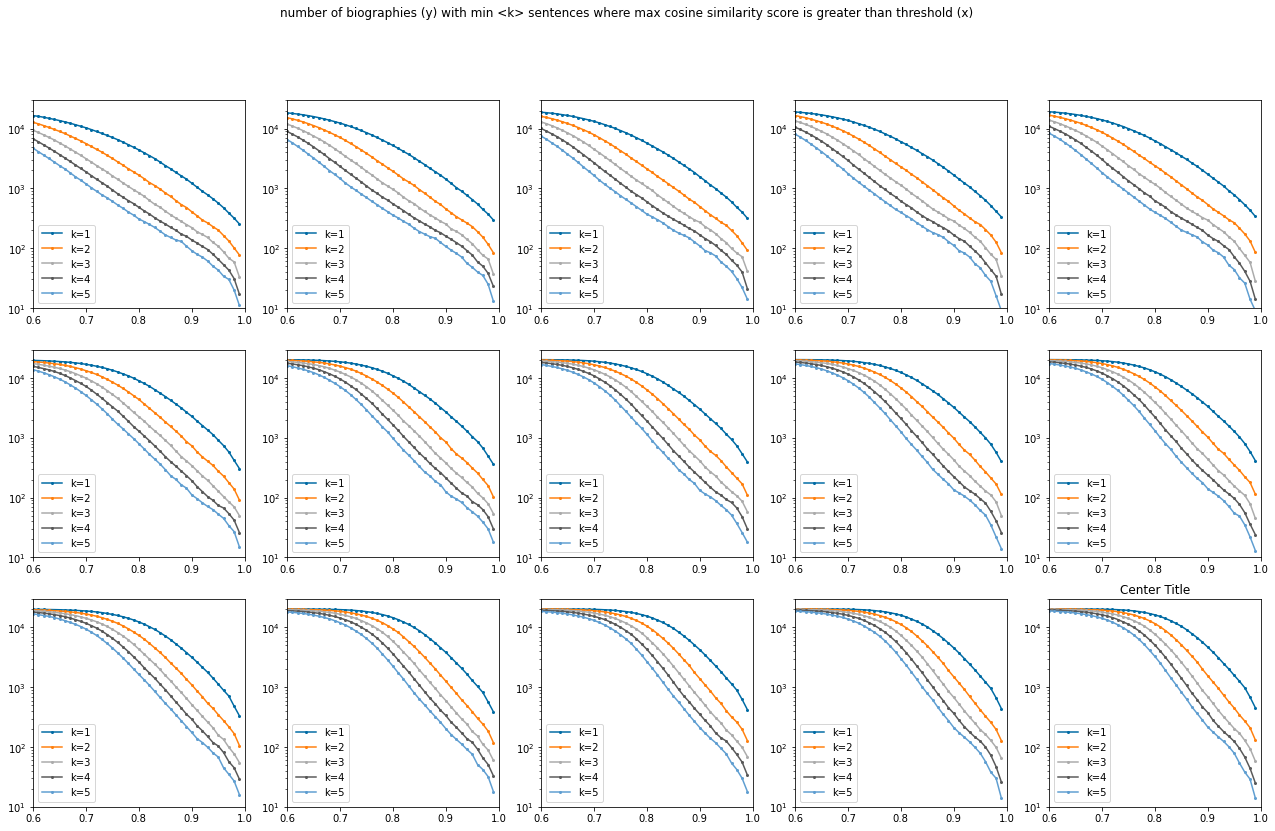

<IPython.core.display.Javascript object>

In [7]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(3,5, figsize=(22,13))
fig.suptitle('number of biographies (y) with min <k> sentences where max cosine similarity score is greater than threshold (x)')
plt.title('Center Title')
for i, (model,v) in enumerate(sentence_transformers_threshold_findings.items()):
    for k,_v in v.items():
        for j,val in enumerate(_v):
            x=[float(x) for x in [*val.keys()]]
            y=[int(x) for x in [*val.values()]]
            ax[i,j].plot(x,y,'-o',ms=2,label=f"{k=}")
            ax[i,j].legend()
            ax[i,j].set_ylim(10,30000)
            ax[i,j].set_xlim(0.6,1)
            ax[i,j].set_yscale('log')
plt.show()